In [11]:
%load_ext autoreload
%autoreload 2

from video_creator import Visualization

import numpy as np
import pandas as pd
import os
import cv2 as cv
import skimage.io as io
from skimage.transform import resize
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data analysise

In [5]:
demo_xl = pd.read_excel('/Users/mariakrylova/Documents/ZaVod/data/demo.xlsx', sheet_name=[0,1,2])
fix_xl = pd.read_excel('/Users/mariakrylova/Documents/ZaVod/data/Fixation_report.xlsx', sheet_name=[0,1,2])

In [6]:
demo = pd.concat([demo_xl[0], demo_xl[1], demo_xl[2]], ignore_index=True, sort=False)
demo = demo.iloc[:, :6]

In [7]:
demo.describe()

,Group,Sex,Grade,Age,IQ
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,1.540717,1.563518,3.058632,9.325733,31.218241
std,0.848376,0.496759,1.530672,1.579512,3.814480
min,1.000000,1.000000,1.000000,6.000000,15.000000
25%,1.000000,1.000000,2.000000,8.000000,29.000000
50%,1.000000,2.000000,3.000000,9.000000,32.000000
75%,2.000000,2.000000,4.000000,10.000000,34.000000
max,3.000000,2.000000,6.000000,14.000000,36.000000


In [8]:
founded = []
for iter, row in demo.iterrows():
    iq, age, grade, sex  = row['IQ'], row['Age'], row['Grade'], row['Sex']
    if 10 <= age <= 12:
        df = demo[(demo["Grade"] == grade) & (demo["Age"] == age) & (demo["IQ"] == iq)]
        if (len(df['Sex'].unique()) == 2) and ((df["SubjectID"].tolist() not in founded)) and (len(df['Group'].unique()) >= 2):
            founded.append(df["SubjectID"].tolist())
            display(df)

,Group,SubjectID,Sex,Grade,Age,IQ
1,1,108,1,4,10,34
2,1,11,2,4,10,34
14,1,2,2,4,10,34
53,1,m13,2,4,10,34
95,1,m84,1,4,10,34
98,1,m89,1,4,10,34
214,2,m108,2,4,10,34
236,3,asd17,2,4,10,34
248,3,kdr19,2,4,10,34
251,3,lav22,1,4,10,34


,Group,SubjectID,Sex,Grade,Age,IQ
5,1,12t,1,4,10,36
23,1,3,2,4,10,36
49,1,m11,1,4,10,36
208,1,s94,1,4,10,36
243,3,igod04,1,4,10,36
281,3,pap27,2,4,10,36


,Group,SubjectID,Sex,Grade,Age,IQ
9,1,16t,1,4,11,33
51,1,m112,2,4,11,33
139,1,s156,2,4,11,33
246,3,iodl02,2,4,11,33
250,3,l39,2,4,11,33


,Group,SubjectID,Sex,Grade,Age,IQ
32,1,4,1,4,10,33
100,1,m93,2,4,10,33
107,1,s104,2,4,10,33
114,1,s116,2,4,10,33
245,3,iljaa05,1,4,10,33


,Group,SubjectID,Sex,Grade,Age,IQ
41,1,9,1,4,10,29
269,3,m64,2,4,10,29


,Group,SubjectID,Sex,Grade,Age,IQ
48,1,m106,2,5,11,34
178,1,s53,1,5,11,34
200,1,s86,2,5,11,34
252,3,m14,1,5,11,34
272,3,m74,2,5,11,34


,Group,SubjectID,Sex,Grade,Age,IQ
50,1,m111,1,4,11,30
123,1,s134,2,4,11,30
211,1,s97,2,4,11,30
292,3,s177,1,4,11,30


,Group,SubjectID,Sex,Grade,Age,IQ
60,1,m23,1,5,12,33
174,1,s49,2,5,12,33
195,1,s78,2,5,12,33
218,2,m47,2,5,12,33


,Group,SubjectID,Sex,Grade,Age,IQ
66,1,m34,1,5,11,31
234,2,s71,2,5,11,31


,Group,SubjectID,Sex,Grade,Age,IQ
69,1,m42,2,3,10,34
125,1,s137,2,3,10,34
183,1,s60,1,3,10,34
280,3,mgm07,2,3,10,34


,Group,SubjectID,Sex,Grade,Age,IQ
75,1,m53,2,4,10,35
217,2,m46,2,4,10,35
244,3,ikad01,2,4,10,35
273,3,m78,1,4,10,35
284,3,rps10,2,4,10,35


,Group,SubjectID,Sex,Grade,Age,IQ
76,1,m56,1,6,12,36
186,1,s65,2,6,12,36
215,2,m25,1,6,12,36


,Group,SubjectID,Sex,Grade,Age,IQ
84,1,m65,2,5,11,29
116,1,s124,1,5,11,29
296,3,s38,2,5,11,29


,Group,SubjectID,Sex,Grade,Age,IQ
124,1,s136,1,3,10,32
185,1,s64,2,3,10,32
299,3,s47,2,3,10,32
306,3,zrs09,2,3,10,32


,Group,SubjectID,Sex,Grade,Age,IQ
143,1,s162,1,6,11,34
229,2,s180,2,6,11,34


,Group,SubjectID,Sex,Grade,Age,IQ
152,1,s18,2,3,10,31
242,3,idmi,2,3,10,31
305,3,zaa15,1,3,10,31


,Group,SubjectID,Sex,Grade,Age,IQ
189,1,s69,1,4,10,31
241,3,ichm03,2,4,10,31


**Conlusion:** for vizualization we can take children:

Parameters: 
- IQ: 34
- Age: 11
- Grade: 5

ID:
 - Normal group: m106 (male), s53 (female)
 - Dyslexia gropup: m74 (male), m14 (female)

### Data Visualization

In [9]:
fix = pd.concat([fix_xl[0], fix_xl[1], fix_xl[2]], ignore_index=True, sort=False)
fix.head(5)

,Group,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
0,3,ake05,4,1,167.0,554.9,216
1,3,ake05,4,1,161.0,560.2,162
2,3,ake05,4,2,201.8,562.7,420
3,3,ake05,4,2,225.0,560.3,299
4,3,ake05,4,2,216.2,562.9,393


In [10]:
fix_children = fix[(fix['SubjectID'] == 'm106') |(fix['SubjectID'] == 's53') | (fix['SubjectID'] == 'm74') | (fix['SubjectID'] == 'm14')]
fix_children

,Group,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
14443,3,m14,4,2,250.3,522.0,205
14444,3,m14,4,3,286.8,514.9,182
14445,3,m14,4,4,339.9,501.3,276
14446,3,m14,4,4,408.3,506.7,236
14447,3,m14,4,4,394.2,510.6,243
...,...,...,...,...,...,...,...
205687,1,s53,33,4,636.3,519.8,187
205688,1,s53,33,5,685.2,517.7,154
205689,1,s53,33,5,740.3,515.1,151
205690,1,s53,33,5,842.0,521.2,283


In [8]:
fix_children.describe()

,Group,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
count,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000
mean,2.203855,18.594699,4.166265,592.425783,535.642554,264.087711
std,0.979237,8.388130,2.175701,296.393257,20.632965,133.759373
min,1.000000,4.000000,1.000000,119.100000,480.700000,26.000000
25%,1.000000,12.000000,2.000000,331.950000,521.400000,173.000000
50%,3.000000,19.000000,4.000000,572.300000,536.300000,227.000000
75%,3.000000,25.500000,6.000000,830.500000,550.150000,319.000000
max,3.000000,33.000000,9.000000,1388.500000,717.300000,799.000000


In [9]:
# example of dataframe for size changing video
from sklearn import preprocessing

fix_norm = fix_children.copy()
x = fix_norm['FIX_DURATION'].values.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
fix_norm['FIX_DURATION'] = (x_scaled * 15) + 1 
fix_norm.describe()

,Group,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
count,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000
mean,2.203855,18.594699,4.166265,592.425783,535.642554,5.620072
std,0.979237,8.388130,2.175701,296.393257,20.632965,2.595589
min,1.000000,4.000000,1.000000,119.100000,480.700000,1.000000
25%,1.000000,12.000000,2.000000,331.950000,521.400000,3.852523
50%,3.000000,19.000000,4.000000,572.300000,536.300000,4.900388
75%,3.000000,25.500000,6.000000,830.500000,550.150000,6.685640
max,3.000000,33.000000,9.000000,1388.500000,717.300000,16.000000


**Coordinate system description:**
- The origin is in the upper left corner of the frame
- The abscissa (X) runs along the horizontal axis of the frame
- The ordinate (Y) runs along the vertical axis of the frame

image shape:  (600, 1500, 3)


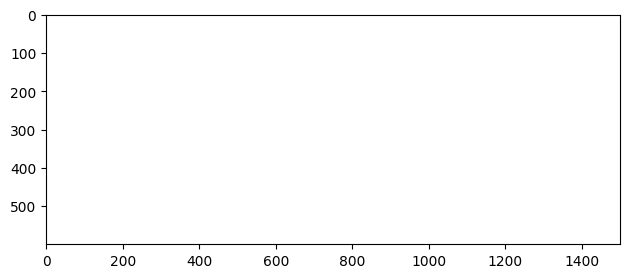

In [3]:
#size of the frame
img_3 = np.zeros([600,1500,3],dtype=np.uint8)
img_3.fill(255)
io.imshow(img_3)
print("image shape: ", img_3.shape)

/var/folders/36/858f9xb17c9g4v6nkwvjh2qc0000gn/T/ipykernel_59258/1112047500.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_points = fix_children.groupby(by=['Word_Number']).mean().iloc[:, 2:4]


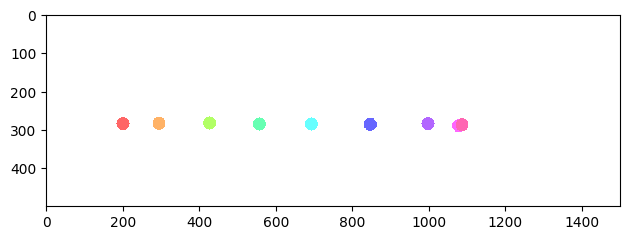

In [11]:
#example of colors for each word
fix_points = fix_children.groupby(by=['Word_Number']).mean().iloc[:, 2:4]
cols = [(255,102,102), (255,178,102), (178, 255, 102), (102, 255, 178), (102,255,255), (102,102,255), (178, 102, 255), (255,102, 255), (255,102,178)]
image_copy = img_3.copy()
shift = 250
for iter, row in fix_points.iterrows():
    center_coordinates = (int(row['FIX_X']), int(row['FIX_Y'] - shift))
    cv.circle(image_copy, center_coordinates, 17, cols[iter - 1], -1)
io.imshow(image_copy)

#### Creation of a dataset

In [12]:
#dyslexia children
fix_d = fix_xl[0]
fix_d['SubjectID'].unique()
visualization_dyslexia = Visualization(fix_d, fix_d['SubjectID'].unique(), [600,1500])
visualization_dyslexia.size_change_video_creation(description=False)

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --di

In [13]:
#normal children
fix_n = fix_xl[2]
fix_n['SubjectID'].unique()
visualization_norm = Visualization(fix_n, fix_n['SubjectID'].unique(), [600,1500])
visualization_norm.size_change_video_creation(description=False)

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --di

In [15]:
fix_r = fix_xl[1]
fix_r['SubjectID'].unique()
visualization_risk = Visualization(fix_r, fix_r['SubjectID'].unique(), [600,1500])
visualization_risk.size_change_video_creation(description=False)

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --di

In [13]:
from pathlib import Path
path = '/Users/mariakrylova/Documents/ZaVod/data/Datasets/cutted' #str(Path(os.getcwd()).parents[0])
d_by_size = {
    "video_name":[],
    "tag":[]
}

for file in os.listdir(path):
    if file != ".DS_Store":
        for video in os.listdir(path + "/" + file):
            if video != ".DS_Store":
                d_by_size["tag"].append(file)
                d_by_size["video_name"].append(video)

data_by_size = pd.DataFrame.from_dict(d_by_size)

In [14]:
from IPython.display import display_html 

df1_styler = data_by_size.head().style.set_table_attributes("style='display:inline'")
df2_styler = data_by_size.tail().style.set_table_attributes("style='display:inline'")

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,video_name,tag
0,idmivideo_by_size.mp4,Dyslexia
1,ichm03video_by_size.mp4,Dyslexia
2,igod04video_by_size.mp4,Dyslexia
3,fka11video_by_size.mp4,Dyslexia
4,asd17video_by_size.mp4,Dyslexia
,video_name,tag
27,m96video_by_size.mp4,Risk
28,m77video_by_size.mp4,Risk
29,m46video_by_size.mp4,Risk
30,m29video_by_size.mp4,Risk


In [15]:
data_by_size.to_csv('/Users/mariakrylova/Documents/ZaVod/data/dataset_by_size.csv')